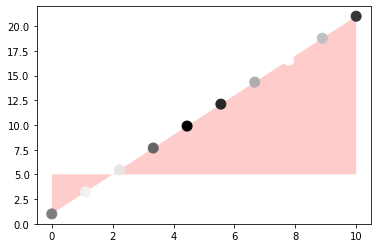

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data...
x = np.linspace(0,10,10)
z = np.sin(x)
y= 2*x+1

# Plot...

plt.fill_between(x, 5, y, facecolor='red', alpha=0.2)
plt.scatter(x, y, c=(z+1)/2, s=100)
#plt.gray()
plt.show()

NameError: name 'x' is not defined

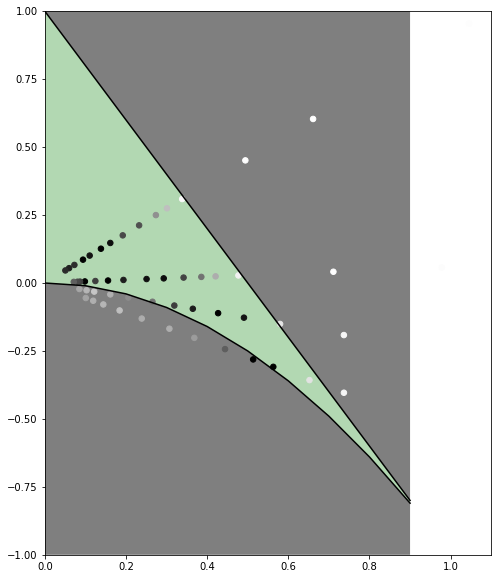

In [53]:
import numpy as np
import matplotlib.pyplot as plt

#constant(s)
grav=9800  #units mm/s/s

#raw data.  time in seconds.  Frequency in rps.
data_p2= np.array([ 1.08,  1.46,  1.26,  2.82, 11.26, 18.58, 24.32, 31.12, 30.8, 29.08, 32.66, 24.94, 32.64, 24.76, 23.58, 20.9 ]) #P2 Beta=1.06
data_p3 = np.array([ 1.82,  1.58,  1.7 ,  2.24,  8.48, 13.4 , 20.24, 21.02, 27.32, 28.84, 26.62, 28.58, 24.04, 25.4 , 24.2 ])  #P3 Beta=2.68
data_p4 = np.array([0.856, 0.724, 0.774, 0.89 , 1.244, 5.18 , 5.18 , 3.54 , 2.46 , 2.14 , 2.16 , 1.84 , 2.00, 2.12 , 2.34 ])  #P4 Beta=0.55
data_p5 = np.array([ 1.  ,  1.18,  1.5 ,  2.58, 15.54, 16.8 , 15.02, 12.98,  9.62, 8.12,  5.9 ,  4.52,  5.62,  6.54])  #P5 Beta=0.77

rps_p2 = np.array([0.59, 0.81, 0.95, 1.16, 1.235, 1.29, 1.37, 1.48, 1.60, 1.82, 2.03, 2.27, 2.55, 2.72, 2.825, 3.00])
rps_p3 = np.array([0.66, 0.83, 0.96, 1.16, 1.23, 1.29, 1.40, 1.54, 1.68, 1.815, 2.03, 2.20, 2.50, 2.76, 3.00])
rps_p4 = np.array([0.63, 0.75, 0.90, 1.11, 1.18, 1.27, 1.33, 1.43, 1.57, 1.72, 1.95, 2.22, 2.51, 2.76, 3.00])
rps_p5 = np.array([0.61, 0.79, 1.02, 1.15, 1.25, 1.34, 1.45, 1.55, 1.70, 1.93, 2.18, 2.51, 2.73, 3.00])

#coefficients are taken from fit to curvatures.  Positive coefficient is Beta * (negative coeff.)
coeff_p2 = 0.00251
coeff_p3 = 0.000997
coeff_p4 = 0.00466
coeff_p5 = 0.00349

beta_p2 = 1.06
beta_p3 = 2.68
beta_p4 = 0.57
beta_p5 = 0.77

#normalize data to maximum value

maximum = np.amax([data_p2.max(), data_p3.max(), data_p4.max(), data_p5.max()]) 
data_n_p2 = data_p2/maximum
data_n_p3 = data_p3/maximum
data_n_p4 = data_p4/maximum
data_n_p5 = data_p5/maximum

# fig = plt.figure()
# plt.title('Normalized Trapping time vs. frequency')
# plt.xlabel('Rotation speed (RPS)')
# plt.ylabel('Trapping time (s)')
# plt.plot(rps_p2, data_n_p2,  'ro')
# plt.plot(rps_p3, data_n_p3,  'yo')
# plt.plot(rps_p4, data_n_p4,  'go')
# plt.plot(rps_p5, data_n_p5,  'bo')
# plt.show()
#

# Create reference lines for plot
q=np.arange(0,1,0.1)
line1=1-2*q
line2=-q**2

#  Cast frequency data into (a,q) form.
q_p2 = grav*coeff_p2* (beta_p2+1) / (2*(2*np.pi*rps_p2)**2)  #see NB p 6.
q_p3 = grav*coeff_p3* (beta_p3+1) / (2*(2*np.pi*rps_p3)**2)  #see NB p 6.
q_p4 = grav*coeff_p4* (beta_p4+1) / (2*(2*np.pi*rps_p4)**2)  #see NB p 6.
q_p5 = grav*coeff_p5* (beta_p5+1) / (2*(2*np.pi*rps_p5)**2)  #see NB p 6.

slope_p2 = 2*(beta_p2 - 1)/(beta_p2 + 1)
slope_p3 = 2*(beta_p3 - 1)/(beta_p3 + 1)
slope_p4 = 2*(beta_p4 - 1)/(beta_p4 + 1)
slope_p5 = 2*(beta_p5 - 1)/(beta_p5 + 1)

a_p2 = q_p2 * slope_p2
a_p3 = q_p3 * slope_p3
a_p4 = q_p4 * slope_p4
a_p5 = q_p5 * slope_p5




fig = plt.figure(figsize=(8, 10))
plt.plot(q,line1, 'k')
plt.plot(q,line2, 'k')
plt.fill_between(q, line1, 1, facecolor='black', alpha=0.5)
plt.fill_between(q, -1, line2, facecolor='black', alpha=0.5)
plt.fill_between(q, line1, line2, facecolor='green', alpha=0.3)
plt.scatter(q_p2, a_p2, c=1-data_n_p2, s=30)
plt.scatter(q_p3, a_p3, c=1-data_n_p3, s=30)
plt.scatter(q_p4, a_p4, c=1-data_n_p4, s=30)
plt.scatter(q_p5, a_p5, c=1-data_n_p5, s=30)
plt.gray()
plt.xlim([0, 1.1])
plt.ylim([-1, 1])
plt.show()

In [23]:
q=np.arange(1,2,)

array([0])

In [11]:
np.amax([2,3,4])

4